# Workflow to analyse SSPFM measurements

by Christian Weymann

First, we do the necessary imports. If hystorian is installed on your system (via pip for example), you can comment out/delete the first three lines. Else, replace the path by a path to a folder that contains the hystorian package.

In [1]:
import sys
hyst_path = 'C:\\Users\\Christian\\Documents\\Python Scripts\\multiscale' #Change to your Hystorian Directory
sys.path.insert(0, hyst_path)

import matplotlib.pyplot as plt
import h5py
import hystorian as hy
import numpy as np
import os
from glob import glob

## 1. Extracting the data

The following cell converts .ARDF files to .hdf5 and extracts the loops. It only needs to be run if there are new .ARDF files.

`Error: ARDF_parse_header - cannot parse!`

and

`Attribute was not able to be saved, probably because the attributeis too large`

can safely be ignored.


In [2]:
path_to_ARDFs = os.path.join(hyst_path, 'data', 'Celine', '**', '*.ARDF') #replace with the path to your raw data

for fn in glob(path_to_ARDFs):
    basename = os.path.splitext(fn)[0]
    if not os.path.isfile(basename + '.hdf5'): #only convert if the file does not already exist
        try:
            hy.tohdf5(basename + '.ARDF')
        except:
            print(basename)
            raise
            
        #After conversion, extract the different on and off parameters    
        with h5py.File(basename + '.hdf5', 'r+') as f:
            bias_path = f['datasets/'+basename+'/Bias'][()]

            for k in f['datasets/' + basename].keys():
                print(k)
                input_path = 'datasets/' + basename + '/' + k
                output_path = [k + '_on', k+'_off'] 

                hy.core.m_apply(basename + '.hdf5',
                                hy.ndim.extract_hist,
                                in_paths = input_path,
                                bias = bias_path,
                                output_names = output_path,
                                increment_proc=False,
                               )

Error: ARDF_parse_header - cannot parse!
b''
Amp
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
Bias
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
Defl
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
Freq
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
Phas2
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attribu

hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
Raw
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
ZSnsr
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
Error: ARDF_parse_header - cannot parse!
b''
Amp
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
Bias
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis t

hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
Phas2
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
Phase
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
Raw
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
ZSnsr
hystorian.processing.ndim
Attribute was not able to be saved, probably because the attributeis too large
hystorian.processing.ndim
Attribu

Next we extract the parameter maps, like the coercive volatages for each point.

In [3]:
#By default, your converted data is at the same path as your raw data, just change the extension.
path_to_hdf5s = os.path.join(hyst_path, 'data', 'Celine', '**', '*.hdf5') #replace with path to your converted data

for fn in glob(path_to_hdf5s):
    basename = os.path.splitext(fn)[0]
    
    #check if the processing was already done, skip file if yes
    with h5py.File(basename + '.hdf5', 'r') as f:
        if 'process/002-PFM_params_map' in f: 
            print(f'{basename} already processed, skipping.')
            continue
            
    hy.core.m_apply(basename+'.hdf5', 
        hy.ndim.PFM_params_map, 
        in_paths=[f'process/001-extract_hist/{basename}/Bias_on',
                f'process/001-extract_hist/{basename}/Phase_off'],
        folder_names = basename,
        output_names = ['coerc_pos', 
                        'coerc_neg', 
                        'step_left', 
                        'step_right', 
                        'imprint', 
                        'phase_shift'])

hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.processing.ndim
hystorian.pr

## 2. Plotting and analysing the data 

In the next cell, we get a list of the measurements we want to analyse, and also a list of the growth temperatures of the corresponding samples (for sorting and coloring).

In [4]:
#list of hdf5 files
filelist = glob(os.path.join(hyst_path, 'data', 'Celine', '**', '*.hdf5'))
start_dir = os.path.commonprefix(filelist)

#dictonary of the growth temperature for each sample
temps_dir = {'m20053': 560,
             'm20054': 540,
             'm20055': 540,
             'm20056': 560,
             'm20057': 560,
             'm20058': 550,
             'm20059': 550,
            }

#extract the sample name from the filename, then look up the growth temperature in the dictionary
temps = [temps_dir[os.path.basename(os.path.dirname(fn))] for fn in filelist]

min_temp = min(temps)
range_temp = max(max(temps)-min(temps), 1)

Next, we plot the parameter maps for each measurement in our list. This helps us to visually check that everything went well with the measurement and the extraction.

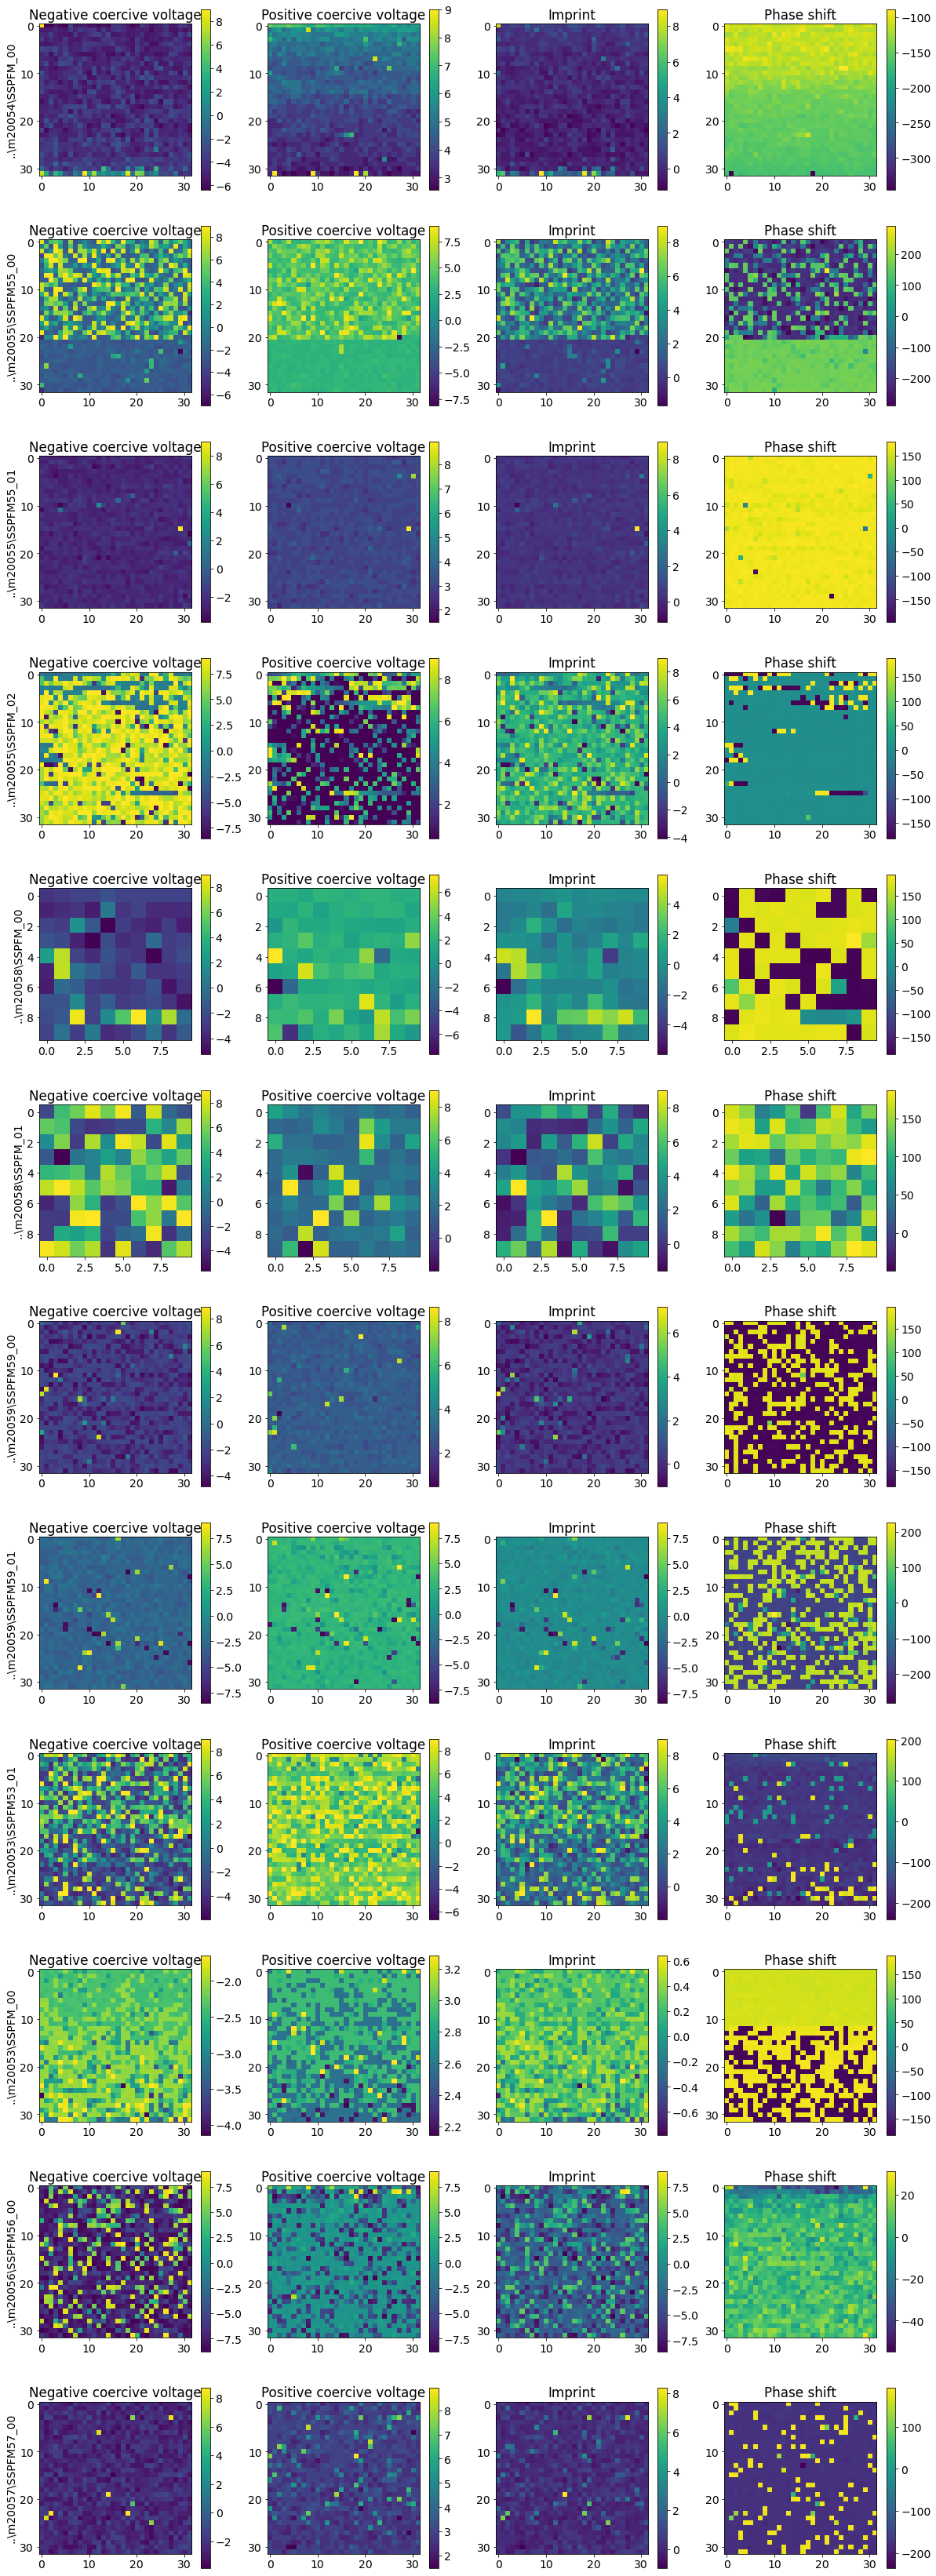

In [5]:
#make font slightly bigger
plt.rc('font', size=14)

#Prepping the figure
fig, axlines = plt.subplots(len(filelist), 4,
                        figsize=(20, 5 * len(filelist)),
                       )


#Go through the files in order of sample temperature
for (_, fn), axs in zip(sorted(zip(temps, filelist)), axlines):
    basename = os.path.splitext(fn)[0]
    
    #Querying the parameter maps from the hdf5
    with h5py.File(basename + '.hdf5', 'r') as f:
        neg = np.array(f['process/002-PFM_params_map/'+basename+'/coerc_neg'])
        pos = np.array(f['process/002-PFM_params_map/'+basename+'/coerc_pos'])
        imprint = np.array(f['process/002-PFM_params_map/'+basename+'/imprint'])
        phase_jump = np.array(f['process/002-PFM_params_map/'+basename+'/phase_shift'])
    
    #Plotting
    neg_plot = axs[0].imshow(neg)
    fig.colorbar(neg_plot, ax=axs[0])
    axs[0].set_ylabel(os.path.relpath(basename, start_dir))
    axs[0].set_title('Negative coercive voltage')
    
    pos_plot = axs[1].imshow(pos)
    fig.colorbar(pos_plot, ax=axs[1])
    axs[1].set_title('Positive coercive voltage')
    
    i_plot = axs[2].imshow(imprint)
    fig.colorbar(i_plot, ax=axs[2])
    axs[2].set_title('Imprint')
    
    pj_plot = axs[3].imshow(phase_jump)
    fig.colorbar(pj_plot, ax=axs[3])
    axs[3].set_title('Phase shift')#the phase shift measures the difference between the endpoints of the loop


Finally, we plot the different loops. Bad loops are eliminated using two criteria:
1. The phase shift is too small, meaning that the sample didn't properly switch during the measurement.
2. The rang the phase covers is too big, meaning the the measurement is very noisy.

You can adjust the limits for the two filters below. Please also indicate how many sweeps were done for each measurement point.

C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: Mean of empty slice.
C:\Users\Christian\Anaconda3\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: Mean of empty slice.
C:\Users\Christian\Anaconda3\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: Mean of empty slice.
C:\Users\Christian\Anaconda3\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice.

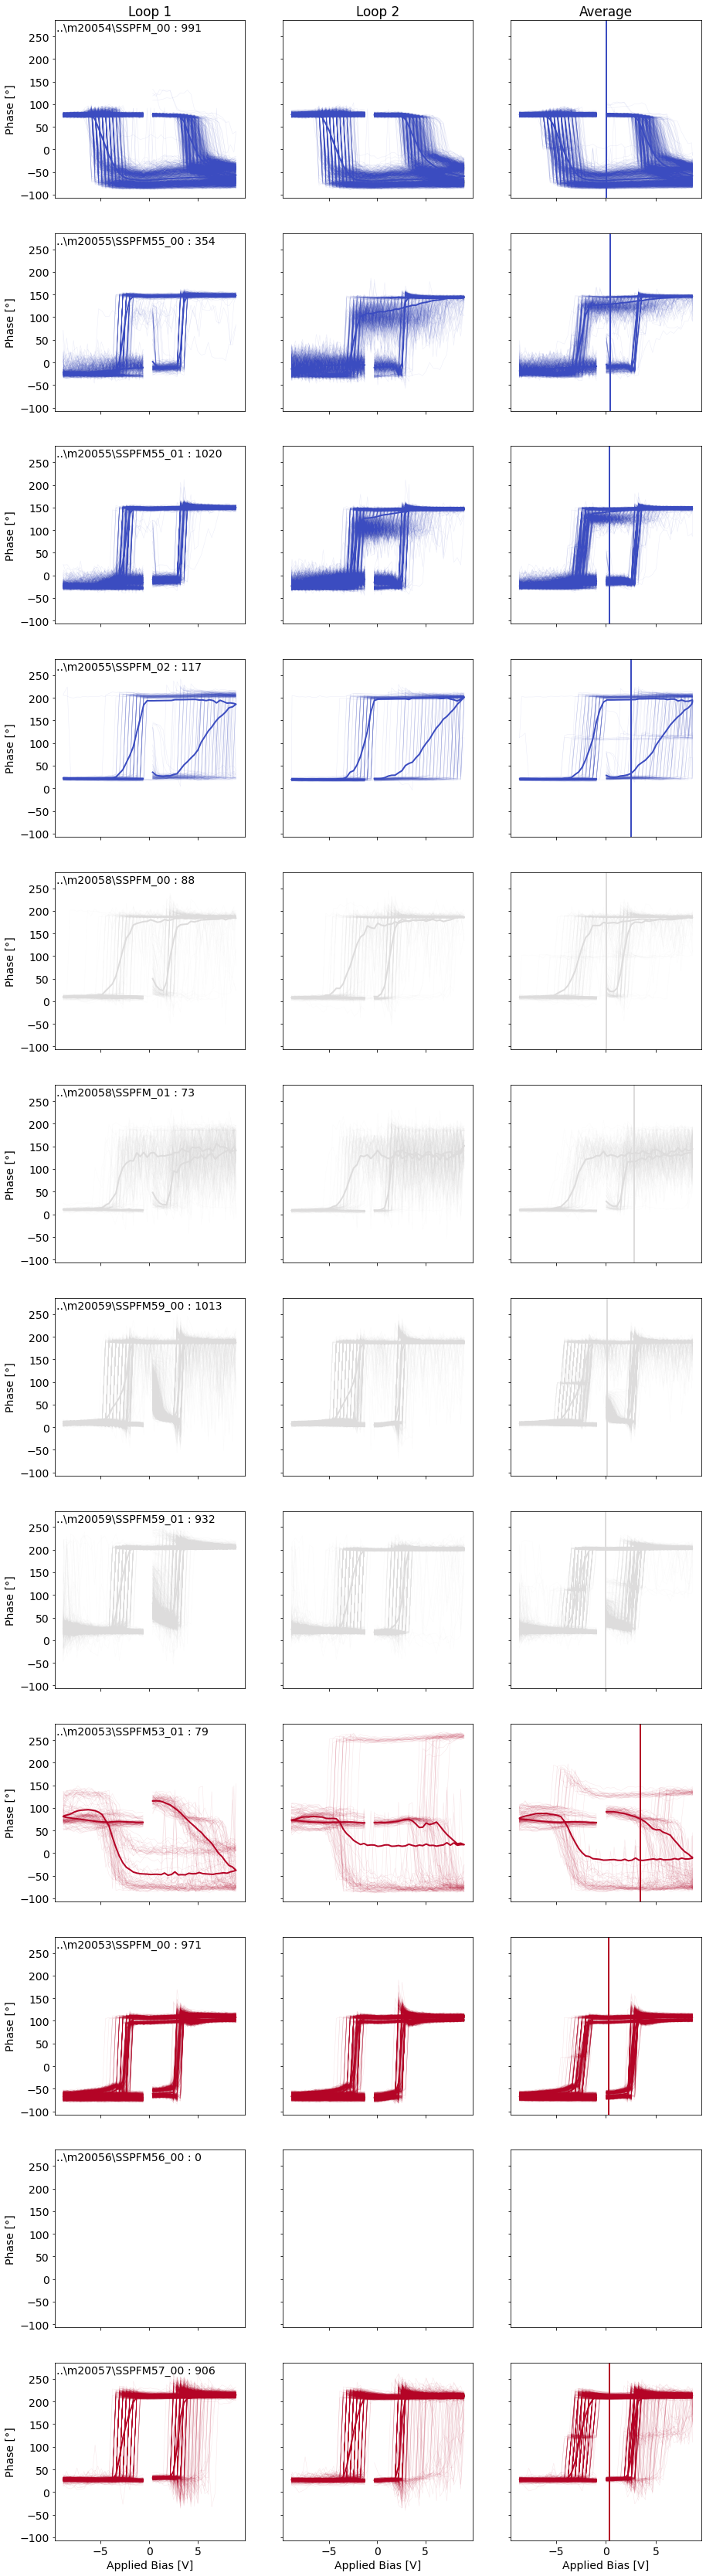

In [6]:
#make font bigger and import the colormaps
from matplotlib import cm
plt.rc('font', size=14)

number_of_loops = 2 #number of loops for each measurement point
min_phase_switch = 90 #minimal change in phase to allow the loop
max_phase_range = 270 #to eliminate moisy loops

#Prep the figure
fig, axlines = plt.subplots(len(filelist), number_of_loops+1,
                        sharey='all',
                        sharex='col',
                        figsize=(5 * (number_of_loops+1), 5 * len(filelist)),
                       )


#Go through files in order of sample temperature
for (temp, fn), axs in zip(sorted(zip(temps, filelist)), axlines):
    basename = os.path.splitext(fn)[0]
    
    #Get the color for each temperature, and define the plot properties for different parts of the plot
    color = cm.coolwarm((temp-min_temp)/range_temp)
    kwargs = {
        'color': color,
        'alpha': 0.1,
        'lw': 0.5,
        } #for individual loops
    kwargsmean = {
        'color': color,
        'lw': 2,
        } #for the average of all loops
    
    #Querying the needed data from the hdf5 file
    with h5py.File(basename + '.hdf5', 'r') as f:
        bias_2D = np.array(f['process/001-extract_hist/' + basename + '/Bias_on'])
        phase_2D = np.array(f['process/001-extract_hist/' + basename + '/Phase_off'])#other values available here
        phase_jump = np.array(f['process/002-PFM_params_map/'+basename+'/phase_shift'])
        imprint = np.array(f['process/002-PFM_params_map/'+basename+'/imprint'])
  
    #evaluate and combine the different filters
    open_loops = np.abs(phase_jump) > min_phase_switch
    clean_loops = np.ptp(phase_2D, axis=-1) < max_phase_range
    mask = np.logical_and(open_loops, clean_loops)
    
    #flatten all dimension except the last
    bias = bias_2D[mask].reshape(-1, bias_2D.shape[-1])
    phase = phase_2D[mask].reshape(-1, phase_2D.shape[-1])
       
    #set up the average loops
    points_per_loop = bias.shape[-1]//number_of_loops
    number_of_curves = bias.shape[0]
    
    x_av = np.zeros((points_per_loop, number_of_curves), dtype=float)
    y_av = np.zeros((points_per_loop, number_of_curves), dtype=float)
    
    #plot the each repetition
    for i, ax in enumerate(axs[:-1]):
        #Add label on the first plot
        if i == 0: 
            ax.set_ylabel('Phase [°]')
            ax.text(0.01, 0.94, f'{os.path.relpath(basename, start_dir)} : {number_of_curves}', transform=ax.transAxes)
        
        #only take a subset of the points corresponding to the repetition
        x = bias.T[i*points_per_loop : (i+1)*points_per_loop]
        y = phase.T[i*points_per_loop : (i+1)*points_per_loop]
        x_av += x
        y_av += y

        ax.plot(x, y, **kwargs)
        ax.plot(x.mean(axis=1), y.mean(axis=1), **kwargsmean)
        
    #compute and plot the averages
    x_av /= number_of_loops
    y_av /= number_of_loops
    axs[-1].plot(x_av, y_av, **kwargs)
    axs[-1].plot(x_av.mean(axis=1), y_av.mean(axis=1), **kwargsmean)
    
    #Add a vertical line showing the average shift of the loops
    mu = imprint[mask].mean()
    axs[-1].axvline(mu, **kwargsmean)

#Add necessary labels
for i, ax in enumerate(axlines[0][:-1]):
    ax.set_title('Loop ' + str(i+1))
axlines[0][-1].set_title('Average')
    
for ax in axlines[-1]:
    ax.set_xlabel('Applied Bias [V]')


When you are happy with the figure, you can export it with the next line:

In [7]:
fig.savefig(os.path.join(hyst_path, 'data', 'LoopsCeline-color.png'))